In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   transit_timestamp    1000000 non-null  object 
 1   transit_mode         1000000 non-null  object 
 2   station_complex_id   1000000 non-null  object 
 3   station_complex      1000000 non-null  object 
 4   borough              1000000 non-null  object 
 5   payment_method       1000000 non-null  object 
 6   fare_class_category  1000000 non-null  object 
 7   ridership            1000000 non-null  float64
 8   transfers            1000000 non-null  float64
 9   latitude             1000000 non-null  float64
 10  longitude            1000000 non-null  float64
 11  georeference         1000000 non-null  object 
dtypes: float64(4), object(8)
memory usage: 91.6+ MB


In [2]:
df.isnull().sum()

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
georeference           0
dtype: int64

In [3]:
df.tail(5)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference
999995,2024-07-05T15:00:00.000,subway,450,103 St-Corona Plaza (7),Queens,metrocard,Metrocard - Other,11.0,0.0,40.749866,-73.86270,POINT (-73.8627 40.749866)
999996,2024-07-05T20:00:00.000,subway,307,116 St-Columbia University (1),Manhattan,metrocard,Metrocard - Other,2.0,0.0,40.807720,-73.96411,POINT (-73.96411 40.80772)
999997,2024-07-05T22:00:00.000,subway,606,"Court Sq (E,G,M,7)",Queens,metrocard,Metrocard - Fair Fare,13.0,1.0,40.747845,-73.94383,POINT (-73.94383 40.747845)
999998,2024-07-05T03:00:00.000,subway,254,Jamaica-179 St (F),Queens,omny,OMNY - Full Fare,14.0,7.0,40.712646,-73.78381,POINT (-73.78381 40.712646)
999999,2024-07-05T04:00:00.000,subway,136,New Lots Av (L),Brooklyn,metrocard,Metrocard - Fair Fare,3.0,1.0,40.658733,-73.89923,POINT (-73.89923 40.658733)


In [4]:
df['transit_mode'].value_counts()

transit_mode
subway                   992488
staten_island_railway      3963
tram                       3549
Name: count, dtype: int64

In [60]:
df.duplicated().value_counts()

False    1000000
Name: count, dtype: int64

In [5]:
new_df_subway=df[df['transit_mode']=='subway']
new_df_subway.head(5)
new_df_subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992488 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transit_timestamp    992488 non-null  object 
 1   transit_mode         992488 non-null  object 
 2   station_complex_id   992488 non-null  object 
 3   station_complex      992488 non-null  object 
 4   borough              992488 non-null  object 
 5   payment_method       992488 non-null  object 
 6   fare_class_category  992488 non-null  object 
 7   ridership            992488 non-null  float64
 8   transfers            992488 non-null  float64
 9   latitude             992488 non-null  float64
 10  longitude            992488 non-null  float64
 11  georeference         992488 non-null  object 
dtypes: float64(4), object(8)
memory usage: 98.4+ MB


In [6]:
new_df_subway['time']=[x.split('T') for x in new_df_subway['transit_timestamp']]

/var/folders/9h/7mtmy98n0jl_fwz3rzx0_k300000gn/T/ipykernel_5886/109861777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subway['time']=[x.split('T') for x in new_df_subway['transit_timestamp']]


In [7]:
new_df_subway.head(5)

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,time
0,2022-01-28T06:00:00.000,subway,212,"Kingsbridge Rd (B,D)",Bronx,metrocard,Metrocard - Students,39.0,1.0,40.866978,-73.893510,POINT (-73.89351 40.866978),"[2022-01-28, 06:00:00.000]"
1,2022-01-28T04:00:00.000,subway,209,Far Rockaway-Mott Av (A),Queens,metrocard,Metrocard - Unlimited 30-Day,2.0,0.0,40.603996,-73.755400,POINT (-73.7554 40.603996),"[2022-01-28, 04:00:00.000]"
2,2022-01-28T18:00:00.000,subway,167,"W 4 St-Wash Sq (A,C,E,B,D,F,M)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,215.0,0.0,40.732338,-74.000496,POINT (-74.000496 40.732338),"[2022-01-28, 18:00:00.000]"
3,2022-01-28T00:00:00.000,subway,20,"City Hall (R,W)",Manhattan,omny,OMNY - Full Fare,3.0,0.0,40.713284,-74.006980,POINT (-74.00698 40.713284),"[2022-01-28, 00:00:00.000]"
4,2022-01-28T19:00:00.000,subway,88,"Norwood Av (J,Z)",Brooklyn,omny,OMNY - Full Fare,11.0,0.0,40.681410,-73.880035,POINT (-73.880035 40.68141),"[2022-01-28, 19:00:00.000]"


In [9]:
new_df_subway['date']=[x[0] for x in new_df_subway['time']]
new_df_subway['time']=[x[1] for x in new_df_subway['time']]

/var/folders/9h/7mtmy98n0jl_fwz3rzx0_k300000gn/T/ipykernel_5886/975457845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subway['date']=[x[0] for x in new_df_subway['time']]
/var/folders/9h/7mtmy98n0jl_fwz3rzx0_k300000gn/T/ipykernel_5886/975457845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subway['time']=[x[1] for x in new_df_subway['time']]


In [12]:
new_df_subway['time'].value_counts()
new_df_subway['time'].unique()


array(['06:00:00.000', '04:00:00.000', '18:00:00.000', '00:00:00.000',
       '19:00:00.000', '11:00:00.000', '22:00:00.000', '08:00:00.000',
       '20:00:00.000', '14:00:00.000', '12:00:00.000', '15:00:00.000',
       '10:00:00.000', '07:00:00.000', '01:00:00.000', '13:00:00.000',
       '21:00:00.000', '17:00:00.000', '23:00:00.000', '16:00:00.000',
       '05:00:00.000', '03:00:00.000', '09:00:00.000', '02:00:00.000'],
      dtype=object)

In [13]:
new_df_subway['time'].str.replace?

Signature: str.replace(self, old, new, count=-1, /)
Docstring:
Return a copy with all occurrences of substring old replaced by new.

  count
    Maximum number of occurrences to replace.
    -1 (the default value) means replace all occurrences.

If the optional argument count is given, only the first count occurrences are
replaced.
Type:      method_descriptor

In [14]:
new_df_subway['time']=new_df_subway['time'].str.replace('.000','')

/var/folders/9h/7mtmy98n0jl_fwz3rzx0_k300000gn/T/ipykernel_5886/2577201477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subway['time']=new_df_subway['time'].str.replace('.000','')


In [16]:
new_df_subway['time'].unique()

array(['06:00:00', '04:00:00', '18:00:00', '00:00:00', '19:00:00',
       '11:00:00', '22:00:00', '08:00:00', '20:00:00', '14:00:00',
       '12:00:00', '15:00:00', '10:00:00', '07:00:00', '01:00:00',
       '13:00:00', '21:00:00', '17:00:00', '23:00:00', '16:00:00',
       '05:00:00', '03:00:00', '09:00:00', '02:00:00'], dtype=object)

In [18]:
new_df_subway.head(5)
new_df_subway.drop(columns=['transit_timestamp'],inplace=True)

/var/folders/9h/7mtmy98n0jl_fwz3rzx0_k300000gn/T/ipykernel_5886/1603293747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subway.drop(columns=['transit_timestamp'],inplace=True)


In [21]:
new_df_subway.columns

Index(['transit_mode', 'station_complex_id', 'station_complex', 'borough',
       'payment_method', 'fare_class_category', 'ridership', 'transfers',
       'latitude', 'longitude', 'georeference', 'time', 'date'],
      dtype='object')

In [61]:
import plotly.express as px
import kaleido


temp_df_jan22=new_df_subway[
    (new_df_subway['date']>='2022-01-01')&
    (new_df_subway['date']<'2022-02-01')]

agg_jan_df=temp_df_jan22.groupby(['latitude','longitude','borough','station_complex'],as_index=False)['ridership'].sum()



In [58]:
agg_jan_df.sort_values(by='ridership',ascending=False).head(50)

,latitude,longitude,borough,station_complex,ridership
334,40.757310,-73.986755,Manhattan,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",477743.0
316,40.751778,-73.976845,Manhattan,"Grand Central-42 St (S,4,5,6,7)",314963.0
311,40.749718,-73.987820,Manhattan,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",284258.0
269,40.735737,-73.989950,Manhattan,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",254626.0
213,40.710373,-74.006570,Manhattan,"Fulton St (A,C,J,Z,2,3,4,5)",203224.0
318,40.752290,-73.993390,Manhattan,"34 St-Penn Station (A,C,E)",196571.0
354,40.768295,-73.981735,Manhattan,"59 St-Columbus Circle (A,B,C,D,1)",191529.0
338,40.759600,-73.830030,Queens,Flushing-Main St (7),189028.0
298,40.746850,-73.891335,Queens,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",184115.0
313,40.750374,-73.991060,Manhattan,"34 St-Penn Station (1,2,3)",178918.0


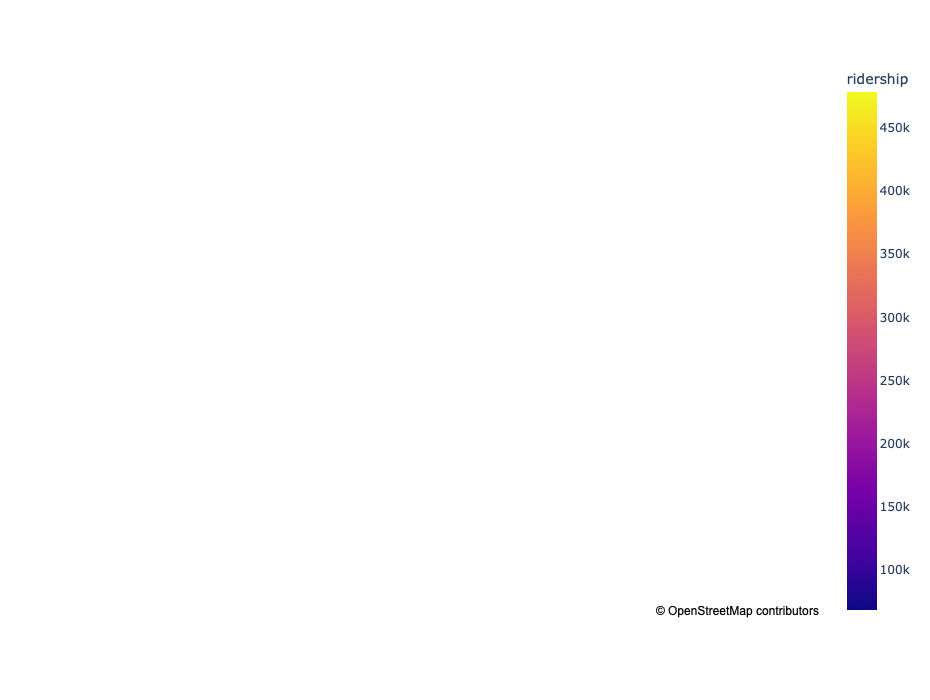

In [62]:
fig=px.density_mapbox(
    agg_jan_df.sort_values(by='ridership',ascending=False).head(50),
    lat='latitude',
    lon='longitude',
    z='ridership',
    hover_name='station_complex',
    radius=15,
    zoom=10,
    mapbox_style="open-street-map",
    height=700
)

fig.show()
fig.write_image("top50_subway_heatmap_jan22.png")

In [63]:
#px.scatter_mapbox?

In [56]:
#px.scatter_mapbox?

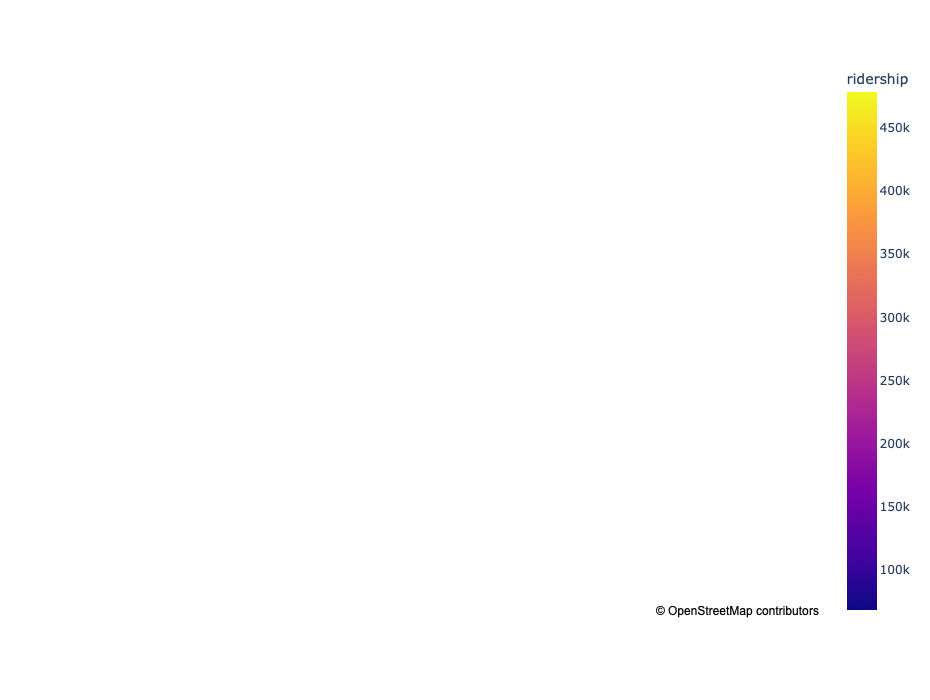

In [64]:
fig=px.scatter_mapbox(
    data_frame=agg_jan_df.sort_values(by='ridership',ascending=False).head(50),
    lat='latitude',
    lon='longitude',
    size='ridership',
    color='ridership',
    hover_name='station_complex',
    zoom=10,
    height=700,
    mapbox_style='open-street-map'
)
fig.show()
fig.write_image("top50_subway_scattermap_jan22.png")

![Top 50 Subway Stations Map](top50_subway_scattermap_jan22.png)


![Top 50 Subway Stations Map](top50_subway_heatmap_jan22.png)